# importing libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# get the data

In [2]:
data= pd.read_excel(r"C:\Users\Ankita\Desktop\Linear Regression.xlsx")
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# get the informtion about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


# check whether the data contains null value:

In [4]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

# check some statics of data:

In [5]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


# get column names of data:

In [6]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

# check the outliers in data:

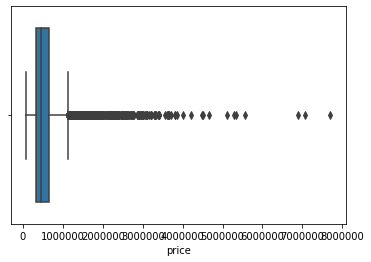

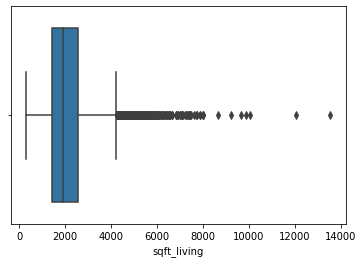

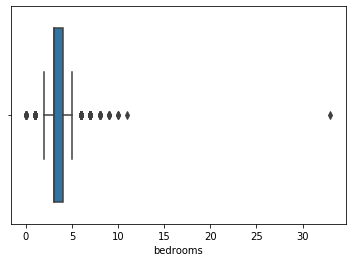

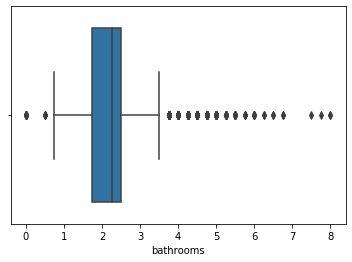

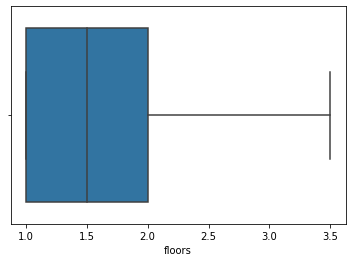

In [7]:
col = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']
for i in col:
    sns.boxplot(data[i])
    plt.show()

# By boxplot:
* floors has no outlier.
* bedroom has moderate outliers.
* other columns has many outliers.

# Correlation matrix:

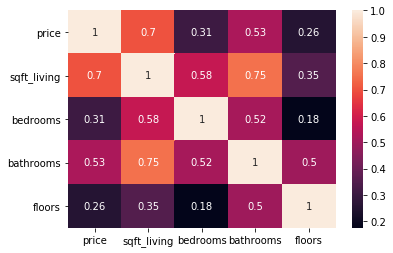

In [8]:
sns.heatmap(data.corr(),annot=True)

# inference from correlation matrix:
* sqft_living is highly correlated with price.
* price has moderate correlation with bedroom and bathrooms.
* price has very less correlation with floors.

# Target variable(price) is continuous in nature .

 # Applying Linear regression:

<h1>                       MODEL 1:</h1>

#####  price vs all:

### splitting data into x,y:

In [75]:
x= data.iloc[:,1:]
y= data.iloc[:,0]

### splitting data into train and test set:

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

### fit the train data into linear model:

In [78]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicted value:

In [79]:
y_pred=lin_reg.predict(x_test)
print("predicted values are : \n",y_pred)

predicted values are : 
 [ 501504.10731294  707644.12393232 1025149.64485874 ...  264559.37726483
  572160.04781013  636387.25755736]


### calulated r2 value:

In [80]:
from sklearn.metrics import r2_score
print("R squared value is: ", r2_score(y_test,y_pred))

R squared value is:  0.49781126417771016


# Inference from model1 :
* r2 value is 0.49 which means only about 49%  of the varience in the target variable.


### regression equation:

In [81]:
print("intercept is : " ,lin_reg.intercept_)
print("coef is:",lin_reg.coef_ )

intercept is :  73044.71489745437
coef is: [   306.55261419 -56715.53776262  10024.37367847   -898.60434389]


#### EQUATION IS: 
 ###### 73044.71489745437+306.55261419( sqft_living)-56715.53776262(bedrooms)+ 10024.37367847 (bathrooms )-898.6043438(floors )

# MODEL 2:

##### price vs living area:

### splitting data into X,y:

In [82]:
x= data.iloc[:,1:2]
y= data.iloc[:,0]

### splitting data into train and test set:

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


### fit the train data into linear model:

In [85]:
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicted value:

In [86]:
y_pred=lin_reg.predict(x_test)
print("predicted values are : \n",y_pred)

predicted values are : 
 [ 536638.48784377  768631.88324074 1011805.68323515 ...  279489.18210255
  556204.1958893   659622.93841566]


### calculated r2 value:

In [87]:
from sklearn.metrics import r2_score
print("R squared value is: ", r2_score(y_test,y_pred))

R squared value is:  0.48388318901296545


# Inference from model 2 :
* r2 value is 0.48 which means only about 48%  of the varience in the target variable.


### regression equation:

In [88]:
print("intercept is : " ,lin_reg.intercept_)
print("coef is:",lin_reg.coef_ )

intercept is :  -41947.45007396606
coef is: [279.51011494]


#### EQUATION IS: 
 ###### -41947.45007396606+279.51011494( sqft_living)

In [89]:
from scipy.stats import pearsonr
stats, p = pearsonr(data.price,data.sqft_living)
stats,p

(0.7020350524336828, 0.0)

#### p value is less than 0.05  that means the col sqft_living significantly imp for the prediction.

# MODEL 3:

##### price vs bedroom:

### splitting data into X,y:

In [90]:
X= data.iloc[:,2:3]
y= data.iloc[:,0]

### splitting data into train and test set:

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [92]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


### fit the train data into linear model:

In [93]:
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicted value:

In [94]:
y_pred=lin_reg.predict(x_test)
print("predicted values are : \n",y_pred)

predicted values are : 
 [ 536638.48784377  768631.88324074 1011805.68323515 ...  279489.18210255
  556204.1958893   659622.93841566]


### calculated r squared value:

In [95]:
from sklearn.metrics import r2_score
print("R squared value is: ", r2_score(y_test,y_pred))

R squared value is:  0.48388318901296545


# Inference from model 3 :
* r2 value is 0.48 which means only about 48%  of the varience in the target variable.


### regression equation:

In [96]:
print("intercept is : " ,lin_reg.intercept_)
print("coef is:",lin_reg.coef_ )

intercept is :  -41947.45007396606
coef is: [279.51011494]


#### EQUATION IS: 
 ###### -41947.45007396606+279.51011494(bedrooms)

In [97]:
from scipy.stats import pearsonr
stats, p = pearsonr(data.price,data.bedrooms)
stats,p

(0.3083495978848292, 0.0)

#### p value is less than 0.05  that means the column bedroom significantly imp for the prediction.

# MODEL 4 :

##### price vs bathroom:

### splitting data into X,y:

In [98]:
X= data.iloc[:,3:4]
y= data.iloc[:,0]

### splitting data into train and test set:

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


### fit the train data into linear model:

In [101]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicted value:

In [102]:
y_pred=lin_reg.predict(x_test)
print("predicted values are : \n",y_pred)

predicted values are : 
 [ 536638.48784377  768631.88324074 1011805.68323515 ...  279489.18210255
  556204.1958893   659622.93841566]


### calculated r2 value: 

In [103]:
from sklearn.metrics import r2_score
print("R squared value is: ", r2_score(y_test,y_pred))

R squared value is:  0.48388318901296545


# Inference from model4 :
* r2 value is 0.48 which means only about 48%  of the varience in the target variable.


### regression equation:

In [104]:
print("intercept is : " ,lin_reg.intercept_)
print("coef is:",lin_reg.coef_ )

intercept is :  -41947.45007396606
coef is: [279.51011494]


#### EQUATION IS: 
 ###### -41947.45007396606+279.51011494 (bathrooms )

In [105]:
from scipy.stats import pearsonr
stats, p = pearsonr(data.price,data.bathrooms)
stats,p

(0.5251375045795997, 0.0)

#### p value is less than 0.05  that means the col bathrooms significantly imp for the prediction.

# MODEL 5:

##### price vs floor:

### splitting data into X,y:

In [106]:
X= data.iloc[:,4:]
y= data.iloc[:,0]

### splitting data into train and test set:

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42 )

In [108]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


### fit the train data into linear model:

In [109]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicted value:

In [110]:
y_pred=lin_reg.predict(x_test)
print("predicted values are : \n",y_pred)

predicted values are : 
 [ 536638.48784377  768631.88324074 1011805.68323515 ...  279489.18210255
  556204.1958893   659622.93841566]


### calculated r2 value:

In [111]:
from sklearn.metrics import r2_score
print("R squared value is: ", r2_score(y_test,y_pred))

R squared value is:  0.48388318901296545


# Inference from model 5 :
* r2 value is 0.48 which means only about 48%  of the varience in the target variable.


### regression equation:

In [112]:
print("intercept is : " ,lin_reg.intercept_)
print("coef is:",lin_reg.coef_ )

intercept is :  -41947.45007396606
coef is: [279.51011494]


#### EQUATION IS: 
 ###### -41947.45007396606+279.51011494(floors )

In [113]:
from scipy.stats import pearsonr
stats, p = pearsonr(data.price,data.floors)
stats,p

(0.25679388406334697, 1.6e-322)

#### p value is less than 0.05  that means the col floors significantly imp for the prediction.